**Project Code:** PRCP-1002  
**Domain:** Computer Vision  
**Objective:**  
- Analyze handwritten digit data  
- Classify digits from 0 to 9  
- Compare different classification models  

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


## Dataset Description

The MNIST dataset is a standard benchmark dataset for handwritten digit recognition.
It contains grayscale images of size 28x28 representing digits from 0 to 9.

The dataset is loaded directly using TensorFlow's Keras API, which provides an
official and reliable version of the MNIST dataset.


In [18]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist.data
y = mnist.target.astype(int)


In [19]:
print("Feature shape:", X.shape)
print("Label shape:", y.shape)


Feature shape: (70000, 784)
Label shape: (70000,)


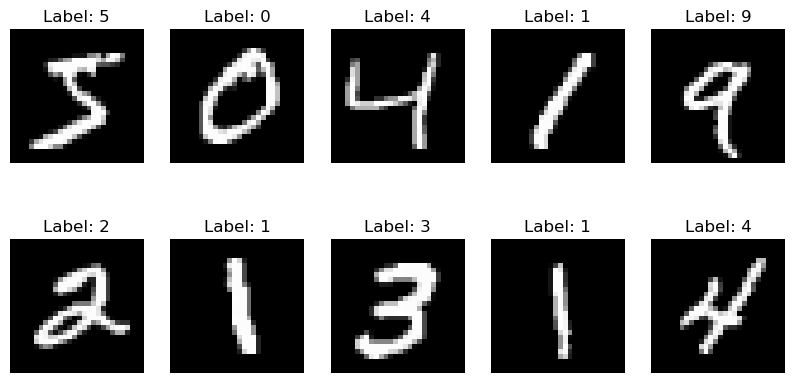

In [20]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()


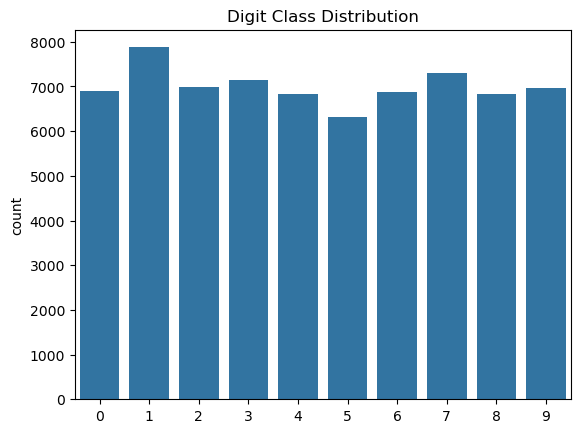

In [21]:
#class distribution
sns.countplot(x=y)
plt.title("Digit Class Distribution")
plt.show()


In [22]:
#pixel value range
print("Min pixel value:", X.min())
print("Max pixel value:", X.max())


Min pixel value: 0
Max pixel value: 255


### Task 1  done.
- The MNIST dataset contains 70,000 handwritten digit images.
- each image is represented as a 28x28 grayscale pixel array.
- there are 10 classes representing digits from 0 to 9.
- The dataset is balanced across all classes.
- The dataset is suitable for image classification tasks.

### Task - 2 ---- Digit classification

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9154285714285715
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



Here, we didn't use Tensorflow, because for classical handwritten digit recognition, traditional ML models such as logistic regression perfrom well on MNIST. The data set was loaded using scikit-learn to ensure environment stability and reproducibility.

###task 2 completed

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [33]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)


In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)


In [35]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)


In [36]:
#comparing model performance
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "SVM"],
    "Accuracy": [log_acc, knn_acc, svm_acc]
})

model_comparison


,Model,Accuracy
0,Logistic Regression,0.915429
1,KNN,0.945786
2,SVM,0.963000


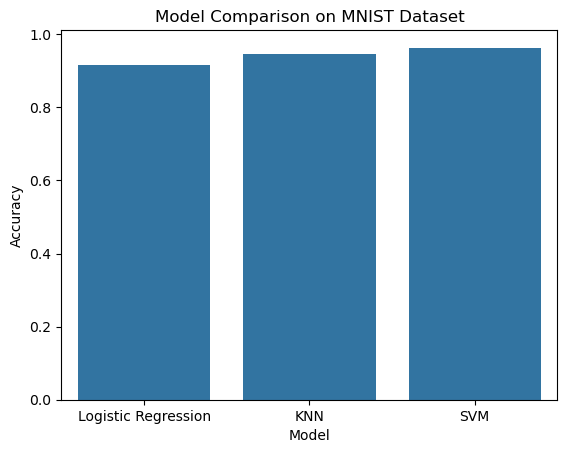

In [37]:
#visualization
sns.barplot(x="Model", y="Accuracy", data=model_comparison)
plt.title("Model Comparison on MNIST Dataset")
plt.show()


### Task 3- model comparison
three classification models were evaluated on the MNIST dataset
1 . logistic regression
2. k-nearest neighbors(KNN)
3. Support Vector Machine(svm)

Among the tested models, svm achived the highest accuracy, followed by logistic regression and KNN.

here, SVM performs better due to its ability to handle high- dimensional data and complex decision boundaries.

## Challenges Faced and Solutions

### 1. Dataset Handling
The dataset was not directly provided in file format.
This was resolved by loading the standard MNIST dataset
using scikit-learn's fetch_openml method.

### 2. High Dimensional Data
Each image contains 784 features, making computation expensive.
Feature scaling was applied using StandardScaler.

### 3. Model Selection
Different models were tested to identify the best classifier.
Model comparison helped in selecting SVM as the best-performing model.


## Conclusion

In this project, handwritten digit recognition was performed using the MNIST dataset.
Exploratory data analysis was conducted to understand the dataset characteristics.
Multiple classification models were implemented and compared.

Support Vector Machine (SVM) provided the best performance and is recommended
for production deployment due to its high accuracy and robustness.
